# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

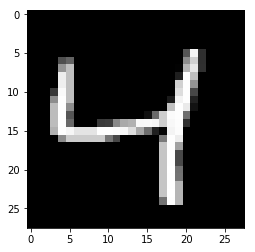

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [69]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

learning_rate = 0.0001
dropout = 0.25

# Input and target placeholders
n_input = 784
n_target = 784

inputs_ = tf.placeholder(tf.float32, [None, n_input])
targets_ = tf.placeholder(tf.float32, [None, n_target])

# Output of hidden layer, single fully connected layer here with ReLU activation
weights_1 = tf.Variable(tf.random_normal([n_input, encoding_dim], stddev = 0.1))
bias_1 = tf.Variable(tf.random_normal([encoding_dim], stddev = 0.1))

encoded = tf.nn.relu(tf.add(tf.matmul(inputs_, weights_1), bias_1))
#encoded = tf.nn.dropout(encoded, dropout)

weight_2 = tf.Variable(tf.random_normal([encoding_dim, n_target], stddev = 0.1))
bias_2 = tf.Variable(tf.random_normal([n_target], stddev = 0.1))

# Output layer logits, fully connected layer with no activation
logits = tf.add(tf.matmul(encoded, weight_2), bias_2)

# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = targets_, logits=logits)

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)\
    .minimize(cost)

## Training

In [70]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [71]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.7151
Epoch: 1/20... Training loss: 0.7152
Epoch: 1/20... Training loss: 0.7151
Epoch: 1/20... Training loss: 0.7154
Epoch: 1/20... Training loss: 0.7141
Epoch: 1/20... Training loss: 0.7115
Epoch: 1/20... Training loss: 0.7116
Epoch: 1/20... Training loss: 0.7103
Epoch: 1/20... Training loss: 0.7096
Epoch: 1/20... Training loss: 0.7088
Epoch: 1/20... Training loss: 0.7082
Epoch: 1/20... Training loss: 0.7078
Epoch: 1/20... Training loss: 0.7069
Epoch: 1/20... Training loss: 0.7057
Epoch: 1/20... Training loss: 0.7051
Epoch: 1/20... Training loss: 0.7051
Epoch: 1/20... Training loss: 0.7044
Epoch: 1/20... Training loss: 0.7027
Epoch: 1/20... Training loss: 0.7020
Epoch: 1/20... Training loss: 0.7021
Epoch: 1/20... Training loss: 0.7000
Epoch: 1/20... Training loss: 0.7014
Epoch: 1/20... Training loss: 0.6999
Epoch: 1/20... Training loss: 0.6993
Epoch: 1/20... Training loss: 0.6985
Epoch: 1/20... Training loss: 0.6984
Epoch: 1/20... Training loss: 0.6978
E

Epoch: 1/20... Training loss: 0.4033
Epoch: 1/20... Training loss: 0.4019
Epoch: 1/20... Training loss: 0.3998
Epoch: 1/20... Training loss: 0.3929
Epoch: 1/20... Training loss: 0.3944
Epoch: 1/20... Training loss: 0.3908
Epoch: 1/20... Training loss: 0.3894
Epoch: 1/20... Training loss: 0.3862
Epoch: 1/20... Training loss: 0.3916
Epoch: 1/20... Training loss: 0.3883
Epoch: 1/20... Training loss: 0.3863
Epoch: 1/20... Training loss: 0.3877
Epoch: 1/20... Training loss: 0.3848
Epoch: 1/20... Training loss: 0.3865
Epoch: 1/20... Training loss: 0.3785
Epoch: 1/20... Training loss: 0.3836
Epoch: 1/20... Training loss: 0.3798
Epoch: 1/20... Training loss: 0.3773
Epoch: 1/20... Training loss: 0.3750
Epoch: 1/20... Training loss: 0.3844
Epoch: 1/20... Training loss: 0.3807
Epoch: 1/20... Training loss: 0.3784
Epoch: 1/20... Training loss: 0.3718
Epoch: 1/20... Training loss: 0.3775
Epoch: 1/20... Training loss: 0.3721
Epoch: 1/20... Training loss: 0.3730
Epoch: 1/20... Training loss: 0.3735
E

Epoch: 2/20... Training loss: 0.2857
Epoch: 2/20... Training loss: 0.2889
Epoch: 2/20... Training loss: 0.2823
Epoch: 2/20... Training loss: 0.2871
Epoch: 2/20... Training loss: 0.2815
Epoch: 2/20... Training loss: 0.2838
Epoch: 2/20... Training loss: 0.2885
Epoch: 2/20... Training loss: 0.2854
Epoch: 2/20... Training loss: 0.2842
Epoch: 2/20... Training loss: 0.2830
Epoch: 2/20... Training loss: 0.2812
Epoch: 2/20... Training loss: 0.2822
Epoch: 2/20... Training loss: 0.2782
Epoch: 2/20... Training loss: 0.2809
Epoch: 2/20... Training loss: 0.2877
Epoch: 2/20... Training loss: 0.2875
Epoch: 2/20... Training loss: 0.2893
Epoch: 2/20... Training loss: 0.2873
Epoch: 2/20... Training loss: 0.2903
Epoch: 2/20... Training loss: 0.2815
Epoch: 2/20... Training loss: 0.2897
Epoch: 2/20... Training loss: 0.2828
Epoch: 2/20... Training loss: 0.2803
Epoch: 2/20... Training loss: 0.2862
Epoch: 2/20... Training loss: 0.2842
Epoch: 2/20... Training loss: 0.2837
Epoch: 2/20... Training loss: 0.2848
E

Epoch: 3/20... Training loss: 0.2553
Epoch: 3/20... Training loss: 0.2612
Epoch: 3/20... Training loss: 0.2589
Epoch: 3/20... Training loss: 0.2604
Epoch: 3/20... Training loss: 0.2600
Epoch: 3/20... Training loss: 0.2525
Epoch: 3/20... Training loss: 0.2595
Epoch: 3/20... Training loss: 0.2589
Epoch: 3/20... Training loss: 0.2570
Epoch: 3/20... Training loss: 0.2624
Epoch: 3/20... Training loss: 0.2573
Epoch: 3/20... Training loss: 0.2593
Epoch: 3/20... Training loss: 0.2577
Epoch: 3/20... Training loss: 0.2565
Epoch: 3/20... Training loss: 0.2562
Epoch: 3/20... Training loss: 0.2599
Epoch: 3/20... Training loss: 0.2569
Epoch: 3/20... Training loss: 0.2539
Epoch: 3/20... Training loss: 0.2560
Epoch: 3/20... Training loss: 0.2486
Epoch: 3/20... Training loss: 0.2539
Epoch: 3/20... Training loss: 0.2586
Epoch: 3/20... Training loss: 0.2535
Epoch: 3/20... Training loss: 0.2553
Epoch: 3/20... Training loss: 0.2601
Epoch: 3/20... Training loss: 0.2558
Epoch: 3/20... Training loss: 0.2540
E

Epoch: 4/20... Training loss: 0.2360
Epoch: 4/20... Training loss: 0.2388
Epoch: 4/20... Training loss: 0.2463
Epoch: 4/20... Training loss: 0.2328
Epoch: 4/20... Training loss: 0.2380
Epoch: 4/20... Training loss: 0.2411
Epoch: 4/20... Training loss: 0.2460
Epoch: 4/20... Training loss: 0.2412
Epoch: 4/20... Training loss: 0.2327
Epoch: 4/20... Training loss: 0.2411
Epoch: 4/20... Training loss: 0.2381
Epoch: 4/20... Training loss: 0.2332
Epoch: 4/20... Training loss: 0.2381
Epoch: 4/20... Training loss: 0.2394
Epoch: 4/20... Training loss: 0.2380
Epoch: 4/20... Training loss: 0.2398
Epoch: 4/20... Training loss: 0.2418
Epoch: 4/20... Training loss: 0.2438
Epoch: 4/20... Training loss: 0.2316
Epoch: 4/20... Training loss: 0.2405
Epoch: 4/20... Training loss: 0.2346
Epoch: 4/20... Training loss: 0.2375
Epoch: 4/20... Training loss: 0.2342
Epoch: 4/20... Training loss: 0.2415
Epoch: 4/20... Training loss: 0.2397
Epoch: 4/20... Training loss: 0.2387
Epoch: 4/20... Training loss: 0.2402
E

Epoch: 4/20... Training loss: 0.2312
Epoch: 4/20... Training loss: 0.2194
Epoch: 4/20... Training loss: 0.2248
Epoch: 4/20... Training loss: 0.2265
Epoch: 4/20... Training loss: 0.2190
Epoch: 4/20... Training loss: 0.2234
Epoch: 4/20... Training loss: 0.2274
Epoch: 4/20... Training loss: 0.2245
Epoch: 4/20... Training loss: 0.2196
Epoch: 4/20... Training loss: 0.2198
Epoch: 4/20... Training loss: 0.2225
Epoch: 4/20... Training loss: 0.2231
Epoch: 4/20... Training loss: 0.2199
Epoch: 4/20... Training loss: 0.2276
Epoch: 4/20... Training loss: 0.2244
Epoch: 4/20... Training loss: 0.2265
Epoch: 5/20... Training loss: 0.2299
Epoch: 5/20... Training loss: 0.2281
Epoch: 5/20... Training loss: 0.2211
Epoch: 5/20... Training loss: 0.2225
Epoch: 5/20... Training loss: 0.2299
Epoch: 5/20... Training loss: 0.2205
Epoch: 5/20... Training loss: 0.2198
Epoch: 5/20... Training loss: 0.2214
Epoch: 5/20... Training loss: 0.2208
Epoch: 5/20... Training loss: 0.2319
Epoch: 5/20... Training loss: 0.2263
E

Epoch: 5/20... Training loss: 0.2120
Epoch: 5/20... Training loss: 0.2091
Epoch: 5/20... Training loss: 0.2153
Epoch: 5/20... Training loss: 0.2124
Epoch: 5/20... Training loss: 0.2177
Epoch: 5/20... Training loss: 0.2107
Epoch: 5/20... Training loss: 0.2102
Epoch: 5/20... Training loss: 0.2096
Epoch: 5/20... Training loss: 0.2155
Epoch: 5/20... Training loss: 0.2069
Epoch: 5/20... Training loss: 0.2014
Epoch: 5/20... Training loss: 0.2162
Epoch: 5/20... Training loss: 0.2067
Epoch: 5/20... Training loss: 0.2138
Epoch: 5/20... Training loss: 0.2116
Epoch: 5/20... Training loss: 0.2114
Epoch: 5/20... Training loss: 0.2215
Epoch: 5/20... Training loss: 0.2133
Epoch: 5/20... Training loss: 0.2104
Epoch: 5/20... Training loss: 0.2138
Epoch: 5/20... Training loss: 0.2035
Epoch: 5/20... Training loss: 0.2107
Epoch: 5/20... Training loss: 0.2168
Epoch: 5/20... Training loss: 0.2081
Epoch: 5/20... Training loss: 0.2069
Epoch: 5/20... Training loss: 0.2143
Epoch: 5/20... Training loss: 0.2098
E

Epoch: 6/20... Training loss: 0.1974
Epoch: 6/20... Training loss: 0.1984
Epoch: 6/20... Training loss: 0.2014
Epoch: 6/20... Training loss: 0.2079
Epoch: 6/20... Training loss: 0.2023
Epoch: 6/20... Training loss: 0.2001
Epoch: 6/20... Training loss: 0.2038
Epoch: 6/20... Training loss: 0.2072
Epoch: 6/20... Training loss: 0.1969
Epoch: 6/20... Training loss: 0.1994
Epoch: 6/20... Training loss: 0.2029
Epoch: 6/20... Training loss: 0.1977
Epoch: 6/20... Training loss: 0.1988
Epoch: 6/20... Training loss: 0.1996
Epoch: 6/20... Training loss: 0.2006
Epoch: 6/20... Training loss: 0.2021
Epoch: 6/20... Training loss: 0.2001
Epoch: 6/20... Training loss: 0.2050
Epoch: 6/20... Training loss: 0.2065
Epoch: 6/20... Training loss: 0.2080
Epoch: 6/20... Training loss: 0.1991
Epoch: 6/20... Training loss: 0.1991
Epoch: 6/20... Training loss: 0.1920
Epoch: 6/20... Training loss: 0.2000
Epoch: 6/20... Training loss: 0.2007
Epoch: 6/20... Training loss: 0.1989
Epoch: 6/20... Training loss: 0.2029
E

Epoch: 7/20... Training loss: 0.1990
Epoch: 7/20... Training loss: 0.1906
Epoch: 7/20... Training loss: 0.1925
Epoch: 7/20... Training loss: 0.1922
Epoch: 7/20... Training loss: 0.1953
Epoch: 7/20... Training loss: 0.1901
Epoch: 7/20... Training loss: 0.1914
Epoch: 7/20... Training loss: 0.1933
Epoch: 7/20... Training loss: 0.1945
Epoch: 7/20... Training loss: 0.1906
Epoch: 7/20... Training loss: 0.1914
Epoch: 7/20... Training loss: 0.1907
Epoch: 7/20... Training loss: 0.1857
Epoch: 7/20... Training loss: 0.1917
Epoch: 7/20... Training loss: 0.1959
Epoch: 7/20... Training loss: 0.1901
Epoch: 7/20... Training loss: 0.1927
Epoch: 7/20... Training loss: 0.1933
Epoch: 7/20... Training loss: 0.1941
Epoch: 7/20... Training loss: 0.1979
Epoch: 7/20... Training loss: 0.1901
Epoch: 7/20... Training loss: 0.1939
Epoch: 7/20... Training loss: 0.1959
Epoch: 7/20... Training loss: 0.1982
Epoch: 7/20... Training loss: 0.1935
Epoch: 7/20... Training loss: 0.1911
Epoch: 7/20... Training loss: 0.1988
E

Epoch: 8/20... Training loss: 0.1819
Epoch: 8/20... Training loss: 0.1883
Epoch: 8/20... Training loss: 0.1907
Epoch: 8/20... Training loss: 0.1807
Epoch: 8/20... Training loss: 0.1870
Epoch: 8/20... Training loss: 0.1870
Epoch: 8/20... Training loss: 0.1804
Epoch: 8/20... Training loss: 0.1870
Epoch: 8/20... Training loss: 0.1828
Epoch: 8/20... Training loss: 0.1868
Epoch: 8/20... Training loss: 0.1811
Epoch: 8/20... Training loss: 0.1961
Epoch: 8/20... Training loss: 0.1798
Epoch: 8/20... Training loss: 0.1803
Epoch: 8/20... Training loss: 0.1834
Epoch: 8/20... Training loss: 0.1914
Epoch: 8/20... Training loss: 0.1829
Epoch: 8/20... Training loss: 0.1865
Epoch: 8/20... Training loss: 0.1860
Epoch: 8/20... Training loss: 0.1887
Epoch: 8/20... Training loss: 0.1787
Epoch: 8/20... Training loss: 0.1841
Epoch: 8/20... Training loss: 0.1850
Epoch: 8/20... Training loss: 0.1846
Epoch: 8/20... Training loss: 0.1858
Epoch: 8/20... Training loss: 0.1798
Epoch: 8/20... Training loss: 0.1873
E

Epoch: 8/20... Training loss: 0.1776
Epoch: 8/20... Training loss: 0.1784
Epoch: 8/20... Training loss: 0.1820
Epoch: 8/20... Training loss: 0.1798
Epoch: 8/20... Training loss: 0.1792
Epoch: 8/20... Training loss: 0.1796
Epoch: 8/20... Training loss: 0.1800
Epoch: 8/20... Training loss: 0.1790
Epoch: 8/20... Training loss: 0.1867
Epoch: 8/20... Training loss: 0.1765
Epoch: 8/20... Training loss: 0.1781
Epoch: 8/20... Training loss: 0.1753
Epoch: 8/20... Training loss: 0.1750
Epoch: 8/20... Training loss: 0.1794
Epoch: 8/20... Training loss: 0.1782
Epoch: 8/20... Training loss: 0.1794
Epoch: 8/20... Training loss: 0.1771
Epoch: 8/20... Training loss: 0.1825
Epoch: 8/20... Training loss: 0.1758
Epoch: 8/20... Training loss: 0.1863
Epoch: 8/20... Training loss: 0.1798
Epoch: 8/20... Training loss: 0.1801
Epoch: 8/20... Training loss: 0.1783
Epoch: 8/20... Training loss: 0.1705
Epoch: 8/20... Training loss: 0.1876
Epoch: 9/20... Training loss: 0.1736
Epoch: 9/20... Training loss: 0.1750
E

Epoch: 9/20... Training loss: 0.1733
Epoch: 9/20... Training loss: 0.1678
Epoch: 9/20... Training loss: 0.1811
Epoch: 9/20... Training loss: 0.1744
Epoch: 9/20... Training loss: 0.1750
Epoch: 9/20... Training loss: 0.1722
Epoch: 9/20... Training loss: 0.1686
Epoch: 9/20... Training loss: 0.1739
Epoch: 9/20... Training loss: 0.1683
Epoch: 9/20... Training loss: 0.1689
Epoch: 9/20... Training loss: 0.1694
Epoch: 9/20... Training loss: 0.1767
Epoch: 9/20... Training loss: 0.1688
Epoch: 9/20... Training loss: 0.1746
Epoch: 9/20... Training loss: 0.1774
Epoch: 9/20... Training loss: 0.1717
Epoch: 9/20... Training loss: 0.1767
Epoch: 9/20... Training loss: 0.1735
Epoch: 9/20... Training loss: 0.1694
Epoch: 9/20... Training loss: 0.1693
Epoch: 9/20... Training loss: 0.1761
Epoch: 9/20... Training loss: 0.1789
Epoch: 9/20... Training loss: 0.1747
Epoch: 9/20... Training loss: 0.1745
Epoch: 9/20... Training loss: 0.1777
Epoch: 9/20... Training loss: 0.1707
Epoch: 9/20... Training loss: 0.1677
E

Epoch: 10/20... Training loss: 0.1698
Epoch: 10/20... Training loss: 0.1787
Epoch: 10/20... Training loss: 0.1675
Epoch: 10/20... Training loss: 0.1762
Epoch: 10/20... Training loss: 0.1651
Epoch: 10/20... Training loss: 0.1659
Epoch: 10/20... Training loss: 0.1679
Epoch: 10/20... Training loss: 0.1644
Epoch: 10/20... Training loss: 0.1741
Epoch: 10/20... Training loss: 0.1658
Epoch: 10/20... Training loss: 0.1725
Epoch: 10/20... Training loss: 0.1692
Epoch: 10/20... Training loss: 0.1708
Epoch: 10/20... Training loss: 0.1710
Epoch: 10/20... Training loss: 0.1683
Epoch: 10/20... Training loss: 0.1655
Epoch: 10/20... Training loss: 0.1793
Epoch: 10/20... Training loss: 0.1659
Epoch: 10/20... Training loss: 0.1714
Epoch: 10/20... Training loss: 0.1699
Epoch: 10/20... Training loss: 0.1685
Epoch: 10/20... Training loss: 0.1730
Epoch: 10/20... Training loss: 0.1704
Epoch: 10/20... Training loss: 0.1689
Epoch: 10/20... Training loss: 0.1685
Epoch: 10/20... Training loss: 0.1753
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1613
Epoch: 11/20... Training loss: 0.1669
Epoch: 11/20... Training loss: 0.1620
Epoch: 11/20... Training loss: 0.1605
Epoch: 11/20... Training loss: 0.1623
Epoch: 11/20... Training loss: 0.1606
Epoch: 11/20... Training loss: 0.1684
Epoch: 11/20... Training loss: 0.1669
Epoch: 11/20... Training loss: 0.1682
Epoch: 11/20... Training loss: 0.1619
Epoch: 11/20... Training loss: 0.1697
Epoch: 11/20... Training loss: 0.1580
Epoch: 11/20... Training loss: 0.1694
Epoch: 11/20... Training loss: 0.1656
Epoch: 11/20... Training loss: 0.1721
Epoch: 11/20... Training loss: 0.1655
Epoch: 11/20... Training loss: 0.1642
Epoch: 11/20... Training loss: 0.1669
Epoch: 11/20... Training loss: 0.1624
Epoch: 11/20... Training loss: 0.1690
Epoch: 11/20... Training loss: 0.1633
Epoch: 11/20... Training loss: 0.1684
Epoch: 11/20... Training loss: 0.1624
Epoch: 11/20... Training loss: 0.1647
Epoch: 11/20... Training loss: 0.1603
Epoch: 11/20... Training loss: 0.1594
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1605
Epoch: 12/20... Training loss: 0.1599
Epoch: 12/20... Training loss: 0.1603
Epoch: 12/20... Training loss: 0.1645
Epoch: 12/20... Training loss: 0.1585
Epoch: 12/20... Training loss: 0.1593
Epoch: 12/20... Training loss: 0.1636
Epoch: 12/20... Training loss: 0.1543
Epoch: 12/20... Training loss: 0.1597
Epoch: 12/20... Training loss: 0.1593
Epoch: 12/20... Training loss: 0.1576
Epoch: 12/20... Training loss: 0.1570
Epoch: 12/20... Training loss: 0.1590
Epoch: 12/20... Training loss: 0.1554
Epoch: 12/20... Training loss: 0.1626
Epoch: 12/20... Training loss: 0.1657
Epoch: 12/20... Training loss: 0.1594
Epoch: 12/20... Training loss: 0.1602
Epoch: 12/20... Training loss: 0.1612
Epoch: 12/20... Training loss: 0.1612
Epoch: 12/20... Training loss: 0.1591
Epoch: 12/20... Training loss: 0.1554
Epoch: 12/20... Training loss: 0.1582
Epoch: 12/20... Training loss: 0.1610
Epoch: 12/20... Training loss: 0.1631
Epoch: 12/20... Training loss: 0.1588
Epoch: 12/20

Epoch: 12/20... Training loss: 0.1559
Epoch: 12/20... Training loss: 0.1498
Epoch: 12/20... Training loss: 0.1632
Epoch: 12/20... Training loss: 0.1573
Epoch: 12/20... Training loss: 0.1575
Epoch: 12/20... Training loss: 0.1558
Epoch: 12/20... Training loss: 0.1531
Epoch: 12/20... Training loss: 0.1540
Epoch: 12/20... Training loss: 0.1597
Epoch: 12/20... Training loss: 0.1553
Epoch: 12/20... Training loss: 0.1582
Epoch: 12/20... Training loss: 0.1625
Epoch: 12/20... Training loss: 0.1584
Epoch: 12/20... Training loss: 0.1485
Epoch: 12/20... Training loss: 0.1512
Epoch: 12/20... Training loss: 0.1518
Epoch: 12/20... Training loss: 0.1560
Epoch: 12/20... Training loss: 0.1546
Epoch: 12/20... Training loss: 0.1538
Epoch: 12/20... Training loss: 0.1561
Epoch: 12/20... Training loss: 0.1569
Epoch: 12/20... Training loss: 0.1586
Epoch: 12/20... Training loss: 0.1560
Epoch: 12/20... Training loss: 0.1555
Epoch: 12/20... Training loss: 0.1520
Epoch: 12/20... Training loss: 0.1623
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1563
Epoch: 13/20... Training loss: 0.1493
Epoch: 13/20... Training loss: 0.1514
Epoch: 13/20... Training loss: 0.1553
Epoch: 13/20... Training loss: 0.1479
Epoch: 13/20... Training loss: 0.1522
Epoch: 13/20... Training loss: 0.1463
Epoch: 13/20... Training loss: 0.1552
Epoch: 13/20... Training loss: 0.1575
Epoch: 13/20... Training loss: 0.1563
Epoch: 13/20... Training loss: 0.1523
Epoch: 13/20... Training loss: 0.1496
Epoch: 13/20... Training loss: 0.1508
Epoch: 13/20... Training loss: 0.1498
Epoch: 13/20... Training loss: 0.1519
Epoch: 13/20... Training loss: 0.1534
Epoch: 13/20... Training loss: 0.1493
Epoch: 13/20... Training loss: 0.1537
Epoch: 13/20... Training loss: 0.1549
Epoch: 13/20... Training loss: 0.1562
Epoch: 13/20... Training loss: 0.1515
Epoch: 13/20... Training loss: 0.1513
Epoch: 13/20... Training loss: 0.1461
Epoch: 13/20... Training loss: 0.1511
Epoch: 13/20... Training loss: 0.1543
Epoch: 13/20... Training loss: 0.1558
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1469
Epoch: 14/20... Training loss: 0.1470
Epoch: 14/20... Training loss: 0.1530
Epoch: 14/20... Training loss: 0.1421
Epoch: 14/20... Training loss: 0.1507
Epoch: 14/20... Training loss: 0.1490
Epoch: 14/20... Training loss: 0.1497
Epoch: 14/20... Training loss: 0.1482
Epoch: 14/20... Training loss: 0.1482
Epoch: 14/20... Training loss: 0.1573
Epoch: 14/20... Training loss: 0.1518
Epoch: 14/20... Training loss: 0.1471
Epoch: 14/20... Training loss: 0.1452
Epoch: 14/20... Training loss: 0.1530
Epoch: 14/20... Training loss: 0.1536
Epoch: 14/20... Training loss: 0.1450
Epoch: 14/20... Training loss: 0.1498
Epoch: 14/20... Training loss: 0.1528
Epoch: 14/20... Training loss: 0.1481
Epoch: 14/20... Training loss: 0.1517
Epoch: 14/20... Training loss: 0.1487
Epoch: 14/20... Training loss: 0.1425
Epoch: 14/20... Training loss: 0.1472
Epoch: 14/20... Training loss: 0.1566
Epoch: 14/20... Training loss: 0.1420
Epoch: 14/20... Training loss: 0.1437
Epoch: 14/20

Epoch: 15/20... Training loss: 0.1413
Epoch: 15/20... Training loss: 0.1474
Epoch: 15/20... Training loss: 0.1500
Epoch: 15/20... Training loss: 0.1419
Epoch: 15/20... Training loss: 0.1445
Epoch: 15/20... Training loss: 0.1433
Epoch: 15/20... Training loss: 0.1423
Epoch: 15/20... Training loss: 0.1422
Epoch: 15/20... Training loss: 0.1457
Epoch: 15/20... Training loss: 0.1438
Epoch: 15/20... Training loss: 0.1464
Epoch: 15/20... Training loss: 0.1472
Epoch: 15/20... Training loss: 0.1449
Epoch: 15/20... Training loss: 0.1492
Epoch: 15/20... Training loss: 0.1452
Epoch: 15/20... Training loss: 0.1450
Epoch: 15/20... Training loss: 0.1467
Epoch: 15/20... Training loss: 0.1432
Epoch: 15/20... Training loss: 0.1398
Epoch: 15/20... Training loss: 0.1492
Epoch: 15/20... Training loss: 0.1475
Epoch: 15/20... Training loss: 0.1458
Epoch: 15/20... Training loss: 0.1481
Epoch: 15/20... Training loss: 0.1481
Epoch: 15/20... Training loss: 0.1482
Epoch: 15/20... Training loss: 0.1464
Epoch: 15/20

Epoch: 15/20... Training loss: 0.1427
Epoch: 15/20... Training loss: 0.1461
Epoch: 15/20... Training loss: 0.1401
Epoch: 15/20... Training loss: 0.1390
Epoch: 15/20... Training loss: 0.1393
Epoch: 15/20... Training loss: 0.1395
Epoch: 15/20... Training loss: 0.1412
Epoch: 15/20... Training loss: 0.1397
Epoch: 15/20... Training loss: 0.1403
Epoch: 15/20... Training loss: 0.1441
Epoch: 15/20... Training loss: 0.1387
Epoch: 16/20... Training loss: 0.1382
Epoch: 16/20... Training loss: 0.1399
Epoch: 16/20... Training loss: 0.1437
Epoch: 16/20... Training loss: 0.1451
Epoch: 16/20... Training loss: 0.1436
Epoch: 16/20... Training loss: 0.1400
Epoch: 16/20... Training loss: 0.1435
Epoch: 16/20... Training loss: 0.1416
Epoch: 16/20... Training loss: 0.1441
Epoch: 16/20... Training loss: 0.1400
Epoch: 16/20... Training loss: 0.1389
Epoch: 16/20... Training loss: 0.1436
Epoch: 16/20... Training loss: 0.1376
Epoch: 16/20... Training loss: 0.1427
Epoch: 16/20... Training loss: 0.1467
Epoch: 16/20

Epoch: 16/20... Training loss: 0.1355
Epoch: 16/20... Training loss: 0.1426
Epoch: 16/20... Training loss: 0.1395
Epoch: 16/20... Training loss: 0.1420
Epoch: 16/20... Training loss: 0.1416
Epoch: 16/20... Training loss: 0.1407
Epoch: 16/20... Training loss: 0.1439
Epoch: 16/20... Training loss: 0.1413
Epoch: 16/20... Training loss: 0.1393
Epoch: 16/20... Training loss: 0.1440
Epoch: 16/20... Training loss: 0.1387
Epoch: 16/20... Training loss: 0.1374
Epoch: 16/20... Training loss: 0.1431
Epoch: 16/20... Training loss: 0.1377
Epoch: 16/20... Training loss: 0.1385
Epoch: 16/20... Training loss: 0.1387
Epoch: 16/20... Training loss: 0.1430
Epoch: 16/20... Training loss: 0.1386
Epoch: 16/20... Training loss: 0.1440
Epoch: 16/20... Training loss: 0.1440
Epoch: 16/20... Training loss: 0.1382
Epoch: 16/20... Training loss: 0.1397
Epoch: 16/20... Training loss: 0.1411
Epoch: 16/20... Training loss: 0.1404
Epoch: 16/20... Training loss: 0.1401
Epoch: 16/20... Training loss: 0.1480
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1385
Epoch: 17/20... Training loss: 0.1407
Epoch: 17/20... Training loss: 0.1403
Epoch: 17/20... Training loss: 0.1379
Epoch: 17/20... Training loss: 0.1337
Epoch: 17/20... Training loss: 0.1392
Epoch: 17/20... Training loss: 0.1421
Epoch: 17/20... Training loss: 0.1384
Epoch: 17/20... Training loss: 0.1425
Epoch: 17/20... Training loss: 0.1388
Epoch: 17/20... Training loss: 0.1373
Epoch: 17/20... Training loss: 0.1355
Epoch: 17/20... Training loss: 0.1354
Epoch: 17/20... Training loss: 0.1404
Epoch: 17/20... Training loss: 0.1401
Epoch: 17/20... Training loss: 0.1397
Epoch: 17/20... Training loss: 0.1322
Epoch: 17/20... Training loss: 0.1322
Epoch: 17/20... Training loss: 0.1355
Epoch: 17/20... Training loss: 0.1388
Epoch: 17/20... Training loss: 0.1356
Epoch: 17/20... Training loss: 0.1353
Epoch: 17/20... Training loss: 0.1354
Epoch: 17/20... Training loss: 0.1339
Epoch: 17/20... Training loss: 0.1364
Epoch: 17/20... Training loss: 0.1374
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1357
Epoch: 18/20... Training loss: 0.1359
Epoch: 18/20... Training loss: 0.1342
Epoch: 18/20... Training loss: 0.1374
Epoch: 18/20... Training loss: 0.1375
Epoch: 18/20... Training loss: 0.1367
Epoch: 18/20... Training loss: 0.1336
Epoch: 18/20... Training loss: 0.1385
Epoch: 18/20... Training loss: 0.1334
Epoch: 18/20... Training loss: 0.1338
Epoch: 18/20... Training loss: 0.1277
Epoch: 18/20... Training loss: 0.1384
Epoch: 18/20... Training loss: 0.1355
Epoch: 18/20... Training loss: 0.1373
Epoch: 18/20... Training loss: 0.1324
Epoch: 18/20... Training loss: 0.1388
Epoch: 18/20... Training loss: 0.1310
Epoch: 18/20... Training loss: 0.1396
Epoch: 18/20... Training loss: 0.1335
Epoch: 18/20... Training loss: 0.1387
Epoch: 18/20... Training loss: 0.1324
Epoch: 18/20... Training loss: 0.1371
Epoch: 18/20... Training loss: 0.1347
Epoch: 18/20... Training loss: 0.1344
Epoch: 18/20... Training loss: 0.1366
Epoch: 18/20... Training loss: 0.1363
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1308
Epoch: 19/20... Training loss: 0.1309
Epoch: 19/20... Training loss: 0.1351
Epoch: 19/20... Training loss: 0.1333
Epoch: 19/20... Training loss: 0.1282
Epoch: 19/20... Training loss: 0.1311
Epoch: 19/20... Training loss: 0.1347
Epoch: 19/20... Training loss: 0.1320
Epoch: 19/20... Training loss: 0.1324
Epoch: 19/20... Training loss: 0.1358
Epoch: 19/20... Training loss: 0.1384
Epoch: 19/20... Training loss: 0.1351
Epoch: 19/20... Training loss: 0.1327
Epoch: 19/20... Training loss: 0.1344
Epoch: 19/20... Training loss: 0.1307
Epoch: 19/20... Training loss: 0.1325
Epoch: 19/20... Training loss: 0.1355
Epoch: 19/20... Training loss: 0.1309
Epoch: 19/20... Training loss: 0.1318
Epoch: 19/20... Training loss: 0.1284
Epoch: 19/20... Training loss: 0.1356
Epoch: 19/20... Training loss: 0.1289
Epoch: 19/20... Training loss: 0.1330
Epoch: 19/20... Training loss: 0.1282
Epoch: 19/20... Training loss: 0.1335
Epoch: 19/20... Training loss: 0.1345
Epoch: 19/20

Epoch: 19/20... Training loss: 0.1347
Epoch: 19/20... Training loss: 0.1301
Epoch: 19/20... Training loss: 0.1275
Epoch: 19/20... Training loss: 0.1281
Epoch: 19/20... Training loss: 0.1341
Epoch: 19/20... Training loss: 0.1316
Epoch: 19/20... Training loss: 0.1300
Epoch: 19/20... Training loss: 0.1250
Epoch: 19/20... Training loss: 0.1327
Epoch: 19/20... Training loss: 0.1327
Epoch: 19/20... Training loss: 0.1305
Epoch: 19/20... Training loss: 0.1285
Epoch: 19/20... Training loss: 0.1326
Epoch: 19/20... Training loss: 0.1286
Epoch: 19/20... Training loss: 0.1285
Epoch: 19/20... Training loss: 0.1298
Epoch: 19/20... Training loss: 0.1264
Epoch: 19/20... Training loss: 0.1255
Epoch: 19/20... Training loss: 0.1337
Epoch: 19/20... Training loss: 0.1312
Epoch: 19/20... Training loss: 0.1292
Epoch: 19/20... Training loss: 0.1301
Epoch: 19/20... Training loss: 0.1309
Epoch: 19/20... Training loss: 0.1336
Epoch: 19/20... Training loss: 0.1267
Epoch: 19/20... Training loss: 0.1301
Epoch: 19/20

Epoch: 20/20... Training loss: 0.1278
Epoch: 20/20... Training loss: 0.1292
Epoch: 20/20... Training loss: 0.1319
Epoch: 20/20... Training loss: 0.1293
Epoch: 20/20... Training loss: 0.1307
Epoch: 20/20... Training loss: 0.1283
Epoch: 20/20... Training loss: 0.1330
Epoch: 20/20... Training loss: 0.1272
Epoch: 20/20... Training loss: 0.1283
Epoch: 20/20... Training loss: 0.1263
Epoch: 20/20... Training loss: 0.1316
Epoch: 20/20... Training loss: 0.1314
Epoch: 20/20... Training loss: 0.1307
Epoch: 20/20... Training loss: 0.1287
Epoch: 20/20... Training loss: 0.1282
Epoch: 20/20... Training loss: 0.1295
Epoch: 20/20... Training loss: 0.1275
Epoch: 20/20... Training loss: 0.1335
Epoch: 20/20... Training loss: 0.1232
Epoch: 20/20... Training loss: 0.1265
Epoch: 20/20... Training loss: 0.1303
Epoch: 20/20... Training loss: 0.1309
Epoch: 20/20... Training loss: 0.1335
Epoch: 20/20... Training loss: 0.1295
Epoch: 20/20... Training loss: 0.1268
Epoch: 20/20... Training loss: 0.1304
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

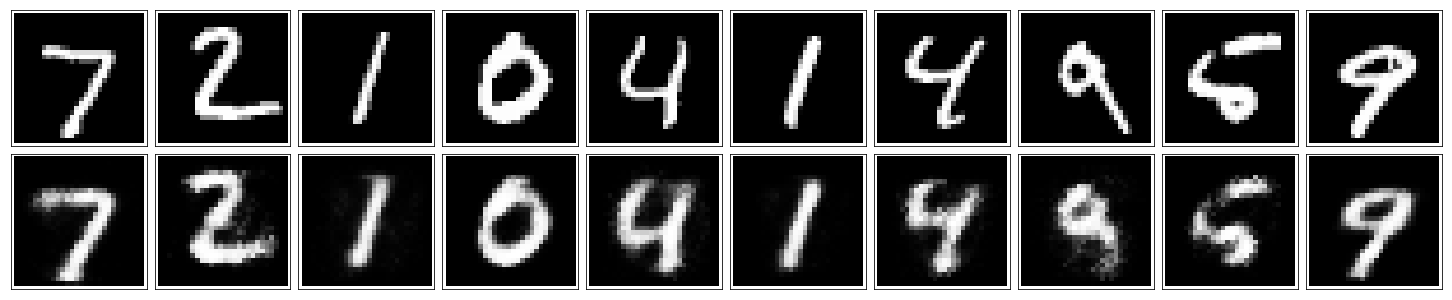

In [72]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.